# Machine Learning Project by Teodor Chakarov

Atomobiles are big thing in everyday life of an average human. They help us being fast, flexable and independent. Though, we have a lot of social problems like air polution, traffic jams, car accidentsand etc.
In that case every country set as regulation for required insurance, at least one, in order to drive a car. People with expensive vehicles should be obligated to do an insurance on order to drive those fast cars.

Here I'm going to see how many people tend to trust an insurance company and make a prediction models for Classification and Regression problems.


# Part 1 - Vehicle Insurance 

In this machine learning part, I'm going to inspect and try to build a model for an insurance company. I have a dataset which has people who use this insurance company's products for Health insurance. The dataset attribues are:
1) Gender

2) Age

3) Driving License (1 - Yes, 0 - No)

4) Redion Code - Unique code for the region of the customer

5) Previously Insured - (0 - Person hasn't got previous vehicle insurance, 1 - Person has got previous vehicle insurance)

6) Vehicle Age

7) Previous Vehicle Damage

8) Annual Premium - The amount customer needs to pay as premium in the year

9) Policy Sales Chanel - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc

10) Vintage - Number of Days, Customer has been associated with the company

11) Response - Does the customer wants to get vehicle insurance (0 - No, 1 - Yes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns


In [187]:
np.random.seed(42)

In [2]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

from lightgbm import LGBMClassifier

In [3]:
insurance = pd.read_csv("data/train.csv")

In [4]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
insurance = insurance.drop('id', axis = 1)

In [6]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [7]:
insurance.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
insurance.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Data Exploration


I'm going briefly to explore the dataset, try to see correlations and how the data is acting between the columns 

In [9]:
print(f"Number of observations are {insurance.shape}")

Number of observations are (381109, 11)


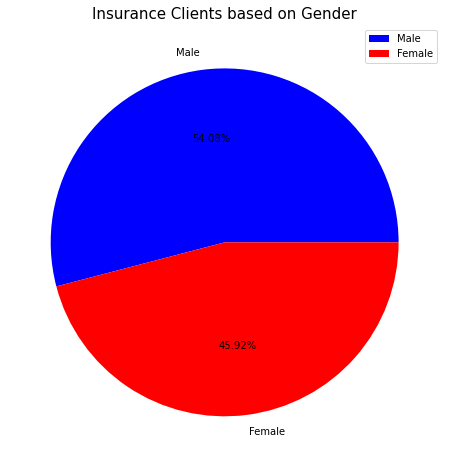

In [10]:
colors = ['blue', 'red']
plt.title('Insurance Clients based on Gender',fontsize=15)
circle = plt.Circle((0, 0), 0.6, color = 'white')
insurance['Gender'].value_counts().plot(kind='pie', figsize=(8, 8), rot=1, colors=colors, autopct = '%.2f%%')
plt.axis('off')
plt.legend()
plt.show()

We can see almost equal distibution between men and women

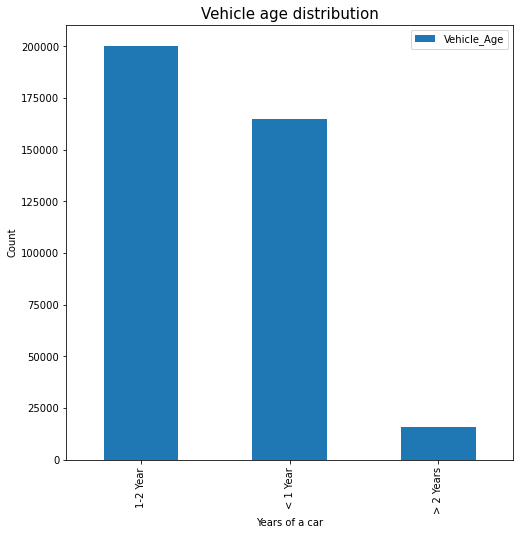

In [11]:
plt.title('Vehicle age distribution',fontsize=15)
insurance['Vehicle_Age'].value_counts().plot(kind='bar', figsize=(8, 8))
plt.xlabel('Years of a car')
plt.ylabel('Count')
plt.legend()
plt.show()

### Customers with previous insurance

In [12]:
health = insurance.groupby(['Gender', 'Previously_Insured'], as_index='Gender').count()
health

Age  Driving_License  Region_Code  Vehicle_Age  \
Gender Previously_Insured                                                      
Female 0                    87071            87071        87071        87071   
       1                    87949            87949        87949        87949   
Male   0                   119410           119410       119410       119410   
       1                    86679            86679        86679        86679   

                           Vehicle_Damage  Annual_Premium  \
Gender Previously_Insured                                   
Female 0                            87071           87071   
       1                            87949           87949   
Male   0                           119410          119410   
       1                            86679           86679   

                           Policy_Sales_Channel  Vintage  Response  
Gender Previously_Insured                                           
Female 0                                  87071    87071     87071  
       1                                  87949    87949     87949  
Male   0                                 119410   119410    119410  
       1                                  86679    86679     86679

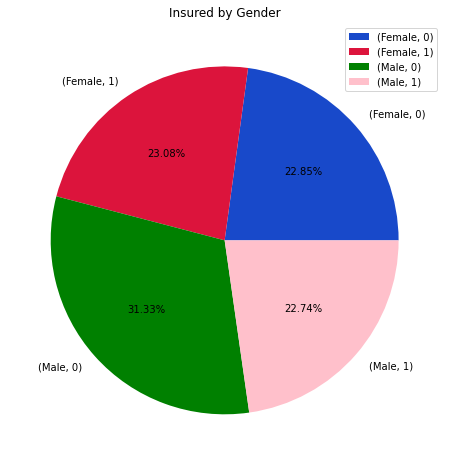

In [13]:
colors = ['#1849CA', 'crimson', 'green', 'pink']
circle = plt.Circle((0, 0), 0.6, color = 'white')
health.plot(x= 'Gender', y='Age',kind='pie', figsize=(8, 8), rot=1, colors=colors, autopct = '%.2f%%')
plt.title('Insured by Gender')
plt.legend()
plt.axis('off')
plt.show()

Clearly men who don't have previous incuranse are more than men who do have but women are nearly equaly distributed.



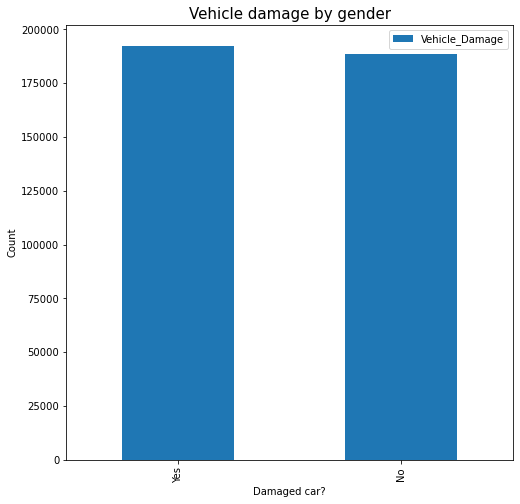

In [14]:
plt.figure(figsize=(8,6))
plt.title('Vehicle damage by gender',fontsize=15)
insurance['Vehicle_Damage'].value_counts().plot(kind='bar', figsize=(8, 8))
plt.xlabel('Damaged car?')
plt.ylabel('Count')
plt.legend()
plt.show()

Here again we have equaly distribution between two categories

In [15]:
men = insurance[insurance['Gender'] =='Male']
female = insurance[insurance['Gender'] == 'Female']

In [16]:
print(men.shape)
print(female.shape)

(206089, 11)
(175020, 11)


#### What did people choose for insuranse? 

In [17]:
people_without_insuranse_accept= insurance[(insurance['Previously_Insured'] == 0) & (insurance['Response'] == 1)]
people_with_insuranse =  insurance[(insurance['Previously_Insured'] == 1) & (insurance['Response'] == 1)]

In [18]:
print(people_without_insuranse_accept.shape)
print(people_with_insuranse.shape)

(46552, 11)
(158, 11)


In [19]:
print(f"As we see people who don't have previous insurance and who will pay for one are {people_without_insuranse_accept.shape[0]} and people who will continue paying are {people_with_insuranse.shape[0]}")

As we see people who don't have previous insurance and who will pay for one are 46552 and people who will continue paying are 158


In [20]:
people_without_insuranse_reject = insurance[( insurance['Previously_Insured'] == 0) & (insurance['Response'] == 0)]
people_with_insuranse_reject =  insurance[(insurance['Previously_Insured'] == 1) & (insurance['Response'] == 0)]

In [21]:
print(people_with_insuranse_reject.shape)
print(people_without_insuranse_reject.shape)

(174470, 11)
(159929, 11)


In [22]:
print(f"We can see that people who don't have previous insurance and won't pay for one are {people_without_insuranse_reject.shape[0]} and people who will stop paying are {people_with_insuranse_reject.shape[0]}")

We can see that people who don't have previous insurance and won't pay for one are 159929 and people who will stop paying are 174470


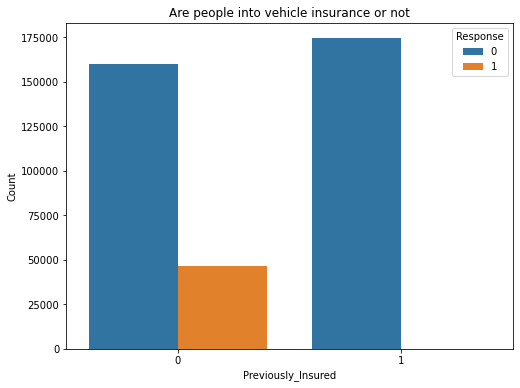

In [23]:
plt.figure(figsize=(8,6))

plt.title('Are people into vehicle insurance or not')

sns.countplot(x = 'Previously_Insured', hue='Response', data = insurance)
plt.ylabel("Count")

plt.show()

#### Our dataset until this point is very well balanced but here we can see that people's response about future insurance is really low. 
We can see that bigger % of people who will pay for one are people who don't have previous insurance.

People's response isn't balanced. That is either people are not satisfied with the insurance company's products or they don't need one.


### Distribution

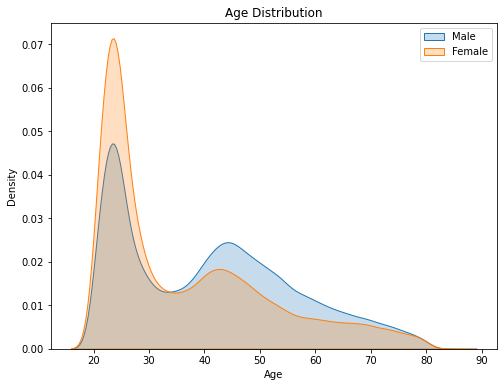

In [24]:
plt.figure(figsize=(8,6))
plt.title('Age Distribution')
m = sns.kdeplot(x = men['Age'], shade = True, legend = True, label = 'Male')
w = sns.kdeplot(x = female['Age'], shade = True, legend = True, label = 'Female')
plt.legend()
plt.show()

We tend to have more people in ther young adult years (20-28) and (40-45) years

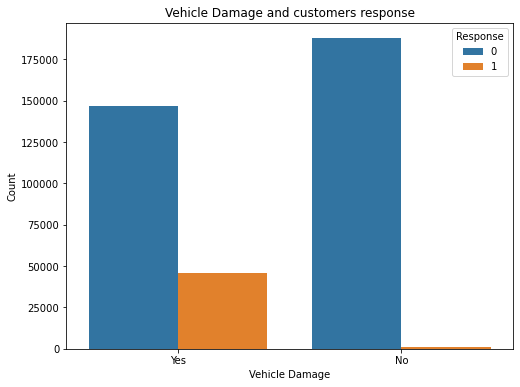

In [25]:
plt.figure(figsize=(8,6))

plt.title('Vehicle Damage and customers response')
sns.countplot(x = 'Vehicle_Damage', hue='Response', data = insurance)

plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.show()

 We can see that people who got in a car accident will have an insurance.

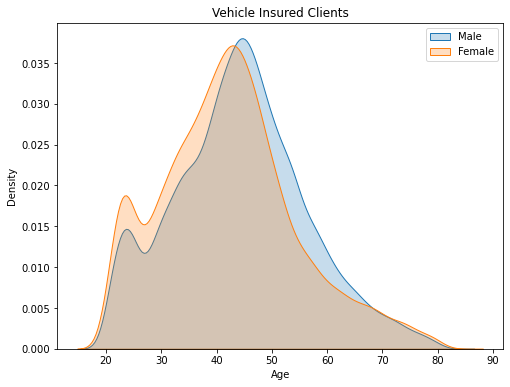

In [26]:
plt.figure(figsize=(8,6))

plt.title('Vehicle Insured Clients')
vehicle_damage = insurance[['Gender', 'Response', 'Age']]
vehicle_damage = vehicle_damage[vehicle_damage['Response'] == 1]
men = vehicle_damage[vehicle_damage.Gender == 'Male']
female = vehicle_damage[vehicle_damage.Gender == 'Female']
m = sns.kdeplot(x = men['Age'], shade = True, legend = 'True', label = 'Male')
w = sns.kdeplot(x = female['Age'], shade = True, legend = 'True', label = 'Female')

plt.legend()
plt.show()

Age definetly afects people response about the insurance. Pople between age of 30-50 tend to look forward an insurance.

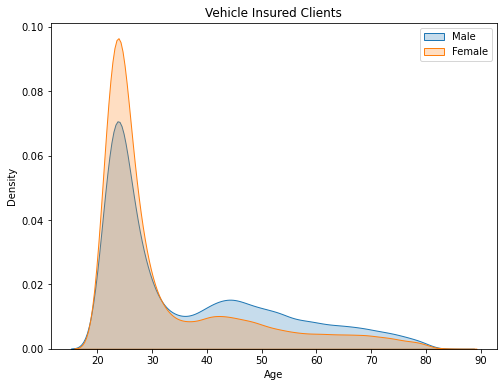

In [27]:
plt.figure(figsize=(8,6))

plt.title('Vehicle Insured Clients')
vehicle_damage = insurance[['Gender', 'Previously_Insured', 'Age']]
vehicle_damage = vehicle_damage[vehicle_damage['Previously_Insured'] == 1]
men = vehicle_damage[vehicle_damage.Gender == 'Male']
female = vehicle_damage[vehicle_damage.Gender == 'Female']
m = sns.kdeplot(x = men['Age'], shade = True, legend = 'True', label = 'Male')
w = sns.kdeplot(x = female['Age'], shade = True, legend = 'True', label = 'Female')

plt.legend()
plt.show()

More of the perviously insuranced clients are at young age.

### In conclusion:
1) In general our dataset is well balanced except people's response about new insurnace.

2) Age, Car Accidents, Previously damaged cars, previous insuranced client are in relations with their response

3) We have to make sure in the machine learning part to stratify the Response equaly in the training and testing set!

## Preparing for Machine Learning

We need to transform our string columns to categorical numbers in order to use them for algorithms

In [28]:
insurance.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
insurance.shape

(381109, 11)

In [30]:
insurance_categorical = pd.get_dummies(insurance)

In [31]:
insurance_categorical.columns = ['Age', 'Driving_License' , 'Region_Code', 'Previously_Insured',
                                 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
                                 'Gender_Female', 'Gender_Male','Vehicle_Age_1-2', 'Vehicle_Age_<1',
                                 'Vehicle_Age_>2', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']

In [32]:
insurance_categorical.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2,Vehicle_Age_<1,Vehicle_Age_>2,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [33]:
insurance_categorical.shape

(381109, 15)

### Feature Selection

We are going to see the correlations and try to exclude some of the unimportant features in this dataset 

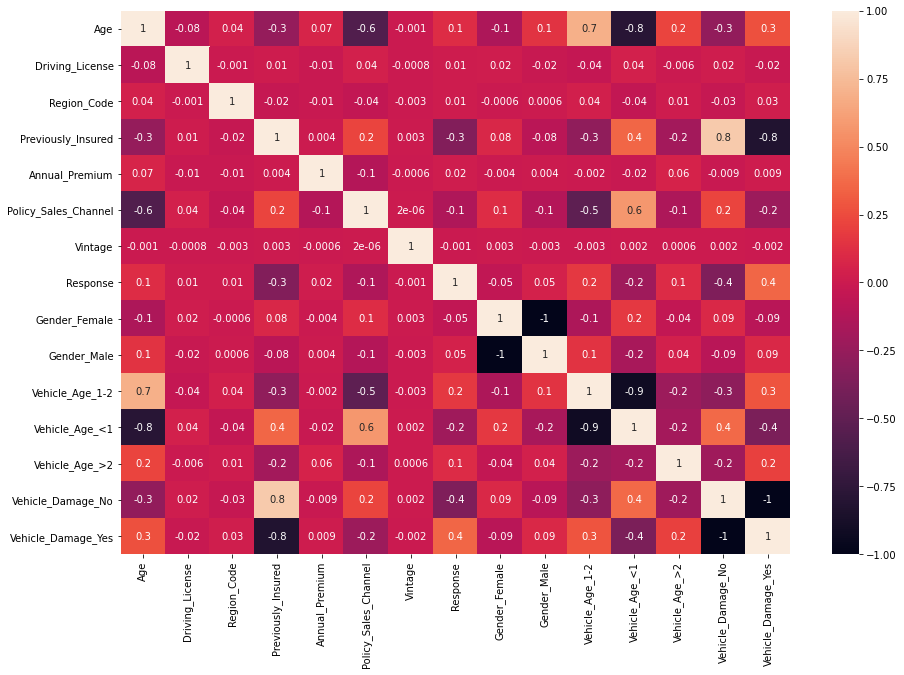

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(insurance_categorical.corr(), annot = True, fmt = '.1g')

plt.show()

So here we can clearly see the correlations in the datast.

Vintage, Annual Premium are in not strong correlation with any of the other features so we can exclude them in this feature selection.

Region code don't have strong relations as well but for now i think it is part of the bigger picture and i'm going to use it.

I don't see features (except dummies features) over 0.9 as well to exclude them because of high variance.

In [35]:
insurance_categorical = insurance_categorical[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                   'Policy_Sales_Channel', 'Gender_Female', "Gender_Male",
                   'Vehicle_Age_1-2', 'Vehicle_Age_<1', 'Vehicle_Age_>2', 'Vehicle_Damage_No',
                          'Vehicle_Damage_Yes', 'Response']]


In [36]:
insurance_categorical.head()

,Age,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Gender_Female,Gender_Male,Vehicle_Age_1-2,Vehicle_Age_<1,Vehicle_Age_>2,Vehicle_Damage_No,Vehicle_Damage_Yes,Response
0,44,1,28.0,0,26.0,0,1,0,0,1,0,1,1
1,76,1,3.0,0,26.0,0,1,1,0,0,1,0,0
2,47,1,28.0,0,26.0,0,1,0,0,1,0,1,1
3,21,1,11.0,1,152.0,0,1,0,1,0,1,0,0
4,29,1,41.0,1,152.0,1,0,0,1,0,1,0,0


In [37]:
insurance_categorical.shape

(381109, 13)

### Normalization

I am going to scale the data using standart MinMax scaler

In [38]:
scaler = MinMaxScaler()

In [39]:
insurance_categorical_scaled = pd.DataFrame(scaler.fit_transform(insurance_categorical), index=insurance_categorical.index,
                                            columns=insurance_categorical.columns)

In [40]:
insurance_categorical_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,0.289578,0.238640,0.0,0.076923,0.246154,0.446154,1.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.000000,1.000000,1.000000,1.0
Region_Code,381109.0,0.507477,0.254421,0.0,0.288462,0.538462,0.673077,1.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.000000,0.000000,1.000000,1.0
Policy_Sales_Channel,381109.0,0.685397,0.334593,0.0,0.172840,0.814815,0.932099,1.0
Gender_Female,381109.0,0.459239,0.498336,0.0,0.000000,0.000000,1.000000,1.0
Gender_Male,381109.0,0.540761,0.498336,0.0,0.000000,1.000000,1.000000,1.0
Vehicle_Age_1-2,381109.0,0.525613,0.499344,0.0,0.000000,1.000000,1.000000,1.0
Vehicle_Age_<1,381109.0,0.432385,0.495408,0.0,0.000000,0.000000,1.000000,1.0
Vehicle_Age_>2,381109.0,0.042001,0.200592,0.0,0.000000,0.000000,0.000000,1.0


In [41]:
pca = PCA()
pca_data = pca.fit_transform(insurance_categorical_scaled)
np.cumsum(pca.explained_variance_ratio_)

array([0.41765109, 0.64786341, 0.82789257, 0.87086048, 0.90906795,
       0.93942138, 0.96653054, 0.99090964, 0.99900758, 1.        ,
       1.        , 1.        , 1.        ])

We can see a how 'heavy' each column is fot the future machine learning. I will try without droping some of the columns first and then I will drop some of them.
I want to see how we can interact and what results are we going to have for each hypothesis.

### Split data

Since we have 381109 observations i'm going to split with training/testing sets like 70/30 and will use a Cross-validation with 8 splits of the training set.

I'm going to stratify 'Response' because as we saw, people who respond with 'No' are more than 'Yes' and we want to split them equaly.

In [42]:
insurance_categorical_scaled_attribues = insurance_categorical_scaled.drop('Response', axis = 1)
insurance_categorical_scaled_target = insurance_categorical_scaled['Response']

In [43]:
print(insurance_categorical_scaled_attribues.shape)
print(insurance_categorical_scaled_target.shape)

(381109, 12)
(381109,)


In [44]:
insurance_attrributes_train, insurance_attrributes_test,insurance_target_train, insurance_target_test = train_test_split(insurance_categorical_scaled_attribues,
                                                                                                                         insurance_categorical_scaled_target,
                                                                                                                         train_size = 0.7, stratify = insurance_categorical_scaled_target,
                                                                                                                        random_state = 42)

In [45]:
print(insurance_attrributes_train.shape)
print(insurance_attrributes_test.shape)
print(insurance_target_train.shape)
print(insurance_target_test.shape)

(266776, 12)
(114333, 12)
(266776,)
(114333,)


In [46]:
k_fold = StratifiedKFold(n_splits = 5)

## Machine Larning algorithms

The problem can be classified as Binary Classification

Im going to try to see the best algorithm using gridSearch (for hyerparameter tuning), base linear classification algorithms and Ensemble methods as well.


The functions that i will use are:

    1) GetModelScores - here i fit and train the model and give scores of both training and testing sets
    
    2) GetOnlyScores - here i will get only scores of the given model 

In [47]:
def GetModelScores (estimator, X_train, X_test, y_train, y_test):
    scores_train = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    scores_test = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    
    model = estimator
    model.fit(X_train, y_train)
    
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    try:
        score_train = model.predict_proba(X_train)[:,1]
        roc_train= roc_auc_score(y_train, score_train, average = "weighted")
    except:
        roc_train = 0
        
    try:
        score_test = model.predict_proba(X_test)[:,1]
        roc_test= roc_auc_score(y_test, score_test, average = "weighted")
    except:
        roc_test = 0
    
    
    
    scores_train['Accuracy'] = accuracy_score(y_train, prediction_train)*100,
    scores_train['F1 Score'] = f1_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Precision'] = precision_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Recall'] = recall_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['ROC_AUC'] = roc_train*100
    
       
    scores_test['Accuracy'] = accuracy_score(y_test, prediction_test)*100,
    scores_test['F1 Score'] = f1_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Precision'] = precision_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Recall'] = recall_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['ROC_AUC'] = roc_test*100
    
    print(scores_train)
    print(scores_test)

In [48]:
def GetOnlyScores (estimator, y_test, X_test, y_train, X_train):
    scores_train = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    scores_test = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    
    prediction_train = estimator.predict(X_train)
    prediction_test = estimator.predict(X_test)
    
    try:
        score_train = estimator.predict_proba(X_train)[:,1]
        roc_train= roc_auc_score(y_train, score_train, average = "weighted")
    except:
        roc_train = 0
        
    try:
        score_test = estimator.predict_proba(X_test)[:,1]
        roc_test= roc_auc_score(y_test, score_test, average = "weighted")
    except:
        roc_test = 0
    
   
    scores_train['Accuracy'] = accuracy_score(y_train, prediction_train)*100,
    scores_train['F1 Score'] = f1_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Precision'] = precision_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Recall'] = recall_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['ROC_AUC'] = roc_train*100
       
    scores_test['Accuracy'] = accuracy_score(y_test, prediction_test)*100,
    scores_test['F1 Score'] = f1_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Precision'] = precision_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Recall'] = recall_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['ROC_AUC'] = roc_test*100

    
    print(scores_train)
    print(scores_test)

### H0: Using all the attributes 

I'm going to see only basic algorithms withount hyperparameters and see the scores of them.

#### 1) Logistic Regression

In [49]:
GetModelScores(LogisticRegressionCV(), insurance_attrributes_train, insurance_attrributes_test, insurance_target_train, insurance_target_test)

E:\programi\Anaconda Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy   F1 Score  Precision    Recall    ROC_AUC
0  87.74365  82.015537  76.989481  87.74365  81.589065
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.743696  82.015603  76.989562  87.743696  81.623501


#### 2)Decision Tree 

In [50]:
GetModelScores(DecisionTreeClassifier(),insurance_attrributes_train, insurance_attrributes_test, insurance_target_train, insurance_target_test)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  90.340211  88.153597   89.59233  90.340211  92.984219
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  86.111621  83.285384  81.844917  86.111621  75.872191


3) Random Forest

In [51]:
GetModelScores(RandomForestClassifier(), insurance_attrributes_train, insurance_attrributes_test, insurance_target_train, insurance_target_test)

    Accuracy  F1 Score  Precision     Recall    ROC_AUC
0  90.339461  88.50126  89.240187  90.339461  92.734743
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  86.336403  83.542926  82.225673  86.336403  82.001257


4) K-Neighbors

In [52]:
#GetModelScores(KNeighborsClassifier(), insurance_attrributes_train, insurance_attrributes_test, insurance_target_train, insurance_target_test)

#### I made a SVC but it is really slow because of the big data: Accuracy: 0.877, F1 Score: 0.820, Precision: 0.771, Recall: 0.877

Based of the ROC Score i will perform Hyperparameter Tuning on Logistic Regression and Random Forest with Grid Search

#### 1) Logistic Regression

In [53]:
parameters = {
    'Cs': [0.001, 0.01, 1, 10, 100],
    "max_iter": [30, 50, 70]
}

In [54]:
grid_logistic = GridSearchCV(LogisticRegressionCV(), param_grid = parameters, scoring = 'roc_auc', cv = k_fold, n_jobs =-1)

In [55]:
grid_logistic.fit(insurance_attrributes_train, insurance_target_train)

E:\programi\Anaconda Python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\programi\Anaconda Python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegressionCV(), n_jobs=-1,
             param_grid={'Cs': [0, 1, 5], 'max_iter': [30, 50, 70]},
             scoring='roc_auc')

In [56]:
grid_logistic.best_estimator_

LogisticRegressionCV(Cs=5, max_iter=30)

In [57]:
grid_logistic.cv_results_

{'mean_fit_time': array([ 0.49776154,  0.46309805,  0.47682352,  5.2885602 ,  4.96693912,
         4.61797304, 26.4103394 , 28.06392841, 24.71973085]),
 'std_fit_time': array([0.02088864, 0.02414118, 0.01552854, 0.31092411, 0.84451059,
        0.37866111, 1.17668541, 2.13838843, 1.34967427]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.07450371, 0.07925324,
        0.06145482, 0.05664582, 0.05644884, 0.02913022]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.0061943 , 0.02452215,
        0.01217321, 0.00419529, 0.01474117, 0.00657447]),
 'param_Cs': masked_array(data=[0, 0, 0, 1, 1, 1, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[30, 50, 70, 30, 50, 70, 30, 50, 70],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?'

In [58]:
GetOnlyScores(grid_logistic, insurance_target_test, insurance_attrributes_test,
              insurance_target_train, insurance_attrributes_train)

E:\programi\Anaconda Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy   F1 Score  Precision    Recall    ROC_AUC
0  87.74365  82.015537  76.989481  87.74365  81.589065
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.743696  82.015603  76.989562  87.743696  81.623501


We can see mean_test_score is the same like ROC_AUC form testing set which is good mark its not overfitting for sure

#### 2) Random Forest

In [59]:
parameters = {
    "n_estimators": [50, 200, 400],
    "max_depth": [10, 50, 70]
}

In [60]:
grid_forest = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'roc_auc', cv = k_fold, n_jobs =-1)
grid_forest.fit(insurance_attrributes_train, insurance_target_train)

grid_forest.best_estimator_


RandomForestClassifier(max_depth=10, n_estimators=400)

In [61]:
grid_forest.cv_results_

{'mean_fit_time': array([ 22.00956697,  85.46010351, 166.74729424,  27.99320359,
        112.04047241, 229.12753773,  30.96114445, 106.37997966,
        175.32476029]),
 'std_fit_time': array([0.13470963, 1.56418593, 3.05414705, 1.49888433, 3.64845302,
        4.45535574, 1.88103708, 5.77008564, 5.62158315]),
 'mean_score_time': array([ 0.67179742,  3.39563074,  5.9375772 ,  1.5132638 ,  7.64443617,
        15.67943964,  2.02094278,  5.63474431,  7.67189159]),
 'std_score_time': array([0.02884264, 0.16665151, 0.69797526, 0.06576681, 1.00163154,
        2.99695218, 0.1562234 , 0.27013901, 1.21861975]),
 'param_max_depth': masked_array(data=[10, 10, 10, 50, 50, 50, 70, 70, 70],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 200, 400, 50, 200, 400, 50, 200, 400],
              mask=[False, False, False, False, False, False, False, False

In [62]:
GetOnlyScores(grid_forest, insurance_target_test, insurance_attrributes_test, 
              insurance_target_train, insurance_attrributes_train)

    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  87.764641  82.071678    88.0381  87.764641  86.05699
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.748944  82.045298  84.541739  87.748944  85.526354


In [63]:
print(f'We see that the ROC score is better than logistic regression also the F1_score so for now we can stop with Random Forest with {grid_forest.best_estimator_}')

We see that the ROC score is better than logistic regression also the F1_score so for now we can stop with Random Forest with RandomForestClassifier(max_depth=10, n_estimators=400)


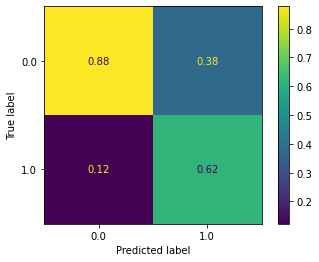

In [64]:
plot_confusion_matrix(grid_forest, insurance_attrributes_test, insurance_target_test, normalize='pred')

Because of the high unbalanced target variable we have less than 50% True Positives

### H1: Machine Learning without high correlation attributes

Here i will see the results if i drop some of the columns with high corr. That way I can perform manuall demensionality reduction to get better results

In [65]:
insurance_lower_dim = insurance_categorical.drop(['Gender_Female', 'Vehicle_Age_<1', 'Vehicle_Damage_No'], axis = 1)

In [66]:
insurance_lower_dim.shape

(381109, 10)

In [67]:
insurance_dim_target = insurance_lower_dim.Response
insurance_dim_attributes = insurance_lower_dim.drop('Response', axis=1)

In [68]:
scaler = MinMaxScaler()

In [69]:
insurance_lower_dim_scaled = scaler.fit_transform(insurance_dim_attributes)

In [70]:
insurance_lower_dim_scaled.shape

(381109, 9)

In [71]:
dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test = train_test_split(insurance_lower_dim_scaled, insurance_dim_target,
                                                                                                            test_size = 0.3,stratify = insurance_dim_target,
                                                                                                            random_state = 42)


In [72]:
print(dim_scaled_attributes_train.shape)
print(dim_scaled_attributes_test.shape)
print(dim_target_train.shape)
print(dim_target_test.shape)

(266776, 9)
(114333, 9)
(266776,)
(114333,)


#### Random Forest Classifier for dimension reduction dataset

In [73]:
GetModelScores(RandomForestClassifier(), dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test)

    Accuracy  F1 Score  Precision     Recall    ROC_AUC
0  90.345084  88.50307  89.253069  90.345084  92.802507
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  86.322409  83.512551  82.182071  86.322409  81.904248


#### Logistic Regression for dimension reduction dataset

In [74]:
GetModelScores(LogisticRegressionCV(cv = k_fold), dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test)

    Accuracy  F1 Score  Precision     Recall    ROC_AUC
0  87.744025  82.01645   89.24612  87.744025  83.640006
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.742821  82.015167  76.989468  87.742821  83.503801


### Conclusion between H0 and H1

I am going to use the smaller dataset since the performance is the same as the 13 attributes one. 
That way i can prevent future overfitting and will learn fastter.

### BOOSTING 

I want to see if i use boosting ML algorithms, can i get better results for the classes 

#### AdaBoostClassifier

In [75]:
GetModelScores(AdaBoostClassifier(), dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.735778  82.017425  79.640643  87.735778  85.276039
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.740197  82.025716  81.759582  87.740197  85.134191


#### GradientBoostingClassifier

In [76]:
GetModelScores(GradientBoostingClassifier(), dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test)

   Accuracy   F1 Score  Precision   Recall    ROC_AUC
0   87.7444  82.018817  85.161455  87.7444  85.647952
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.741947  82.016427  80.054029  87.741947  85.498782


#### LGBMClassifier

In [77]:
GetModelScores(LGBMClassifier(), dim_scaled_attributes_train, dim_scaled_attributes_test,dim_target_train, dim_target_test)

    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  87.758644  82.074442   85.54011  87.758644  86.23847
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.747195  82.066331  83.588836  87.747195  85.673912


#### We can see that LGBMClassifier is the best boosting algorithm and it is really fast with big data. I'm going to perform hyperparameter Tuning

In [180]:
parameters_grid = {
             'num_leaves': [5, 10, 50], 
             'n_estimators': [200, 400, 600],
             'reg_lambda': [5, 50, 100]
        }

In [181]:
grid_booster = GridSearchCV(LGBMClassifier(), parameters_grid, scoring = 'roc_auc',
                            n_jobs = -1, cv = k_fold)

In [182]:
grid_booster.fit(dim_scaled_attributes_train, dim_target_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [200, 400, 600],
                         'num_leaves': [5, 10, 50],
                         'reg_lambda': [5, 50, 100]},
             scoring='roc_auc')

In [183]:
print(f'Here we can see with hyperparameters: {grid_booster.best_estimator_} we have best scores for:')

Here we can see with hyperparameters: LGBMClassifier(n_estimators=600, num_leaves=10, reg_lambda=50) we have best scores for:


In [184]:
GetOnlyScores(grid_booster, dim_target_test, dim_scaled_attributes_test,dim_target_train, dim_scaled_attributes_train)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.769889  82.223388   84.09314  87.769889  86.226088
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.748069  82.189907  83.330402  87.748069  85.733341


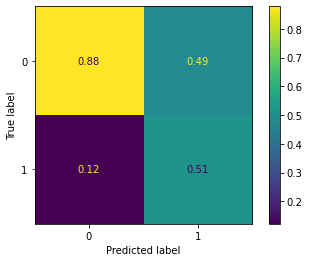

In [185]:
plot_confusion_matrix(grid_booster, dim_scaled_attributes_test, dim_target_test, normalize='pred')
plt.show()

We see that Negative response we have 88 % but Positives are 47%. That's because we have unbalanced Response.
To get better scores in this matrix I'm going to perform Oversampling

### H2: UNDER- AND OVER-SAMPLING

I'm going to use combined method SMOTETomek to see how good the model is going to perform.

In [84]:
from imblearn.combine import SMOTETomek

In [85]:
insurance_lower_dim.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

We can see original distribution of the target labels 

In [86]:
oversample_attributes = insurance_lower_dim.drop('Response', axis = 1)
oversample_target = insurance_lower_dim.Response

In [87]:
balance_data = SMOTETomek()

In [88]:
oversample_attributes_res, oversample_target_res = balance_data.fit_resample(oversample_attributes, oversample_target)

In [89]:
oversample_target_res.value_counts()

1    333939
0    333939
Name: Response, dtype: int64

We can see that the positive response are equal to the negative one because i performed oversampling and got liitle bit undersampling of attributes

In [90]:
sc = MinMaxScaler()

In [91]:
oversample_target = sc.fit_transform(oversample_attributes_res)

In [92]:
oversample_attributes_train, oversample_attributes_test, oversample_target_train, oversample_target_test = train_test_split(oversample_attributes_res,
                                                                                             oversample_target_res, test_size = 0.3, 
                                                                                            random_state = 42)

#### GridSearch with LGBMClassifier

In [93]:
mod_params = {
              'n_estimators':[400, 600, 800],
              'num_leaves': [10, 50, 80],
              'reg_lambda': [0.001, 1, 5, 10]
}

In [94]:
mod = GridSearchCV(LGBMClassifier(), mod_params, scoring = 'roc_auc', cv = k_fold)

In [95]:
mod.fit(oversample_attributes_train, oversample_target_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(),
             param_grid={'n_estimators': [400, 600, 800],
                         'num_leaves': [10, 50, 80],
                         'reg_lambda': [0.001, 1, 5, 10]},
             scoring='roc_auc')

In [96]:
mod.best_estimator_

LGBMClassifier(n_estimators=800, num_leaves=80, reg_lambda=0.001)

In [97]:
GetOnlyScores(mod, oversample_target_test, oversample_attributes_test, oversample_target_train, oversample_attributes_train)

    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  84.713827  84.564811   86.10725  84.713827  91.66507
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  83.556926  83.389787  84.966517  83.556926  90.630414


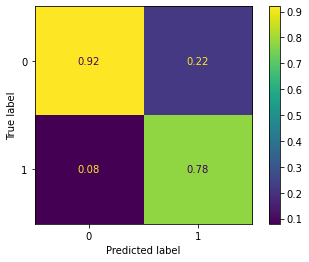

In [98]:
plot_confusion_matrix(mod, oversample_attributes_test, oversample_target_test, normalize='pred')
plt.show()

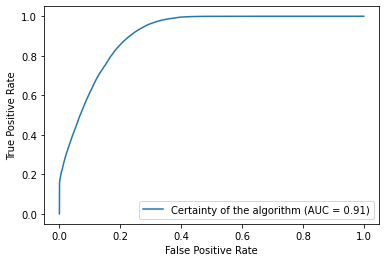

In [99]:
plot_roc_curve(mod, oversample_attributes_test, oversample_target_test, name = "Certainty of the algorithm")
plt.show()

We can see how certain the model is in predicting the output classes. By looking at the graph we can see our cureve is going up more than going to False Positive (right) side

### CONCLUSION

We can see we have less scores in comparison to parameter-tuned LGBMClassifier but the roc_auc score is better, also the confusion matrix gives us better results. For now i'm satisfied with our last model in which we performed:

1) MinMax regularization

2) Feature Selection in which we exclude from the original 15 to 10 columns 

3) Perform an over- and under-sampling in which we deal with unbalanced dataset

4) We chose the best ML algorithm and it's boosting algorithm LGBMClassifier. It is fast with big data and we got the best scores with it.

5) We perform Grid Search with Cross Validation in which we got best estimators.

6) And at last we combined all of these steps to get 91% True Negatives and 76 % True Positives

# Part 2 - Car Price Prediction

In this second part I'm going to predict car prices based on:

1) Car Model

2) Year of production

3) Selling Price

4) KM driven

5) Fuel type

6) Seller Type (Individual, Dealer, Trustmark Dealer)

7) Transmission Type

8) Owner (First Owner, Second Owner, Third Owner, Fourth & Above Owner, Test Drive Car)

9) Mileage

10) Engine Power

11) Max Power

12) Torque

13) Number of seats

The main method will be Regression and we are going to predict number base on the given attributes.

In [100]:
car = pd.read_csv('data/vehicle.csv')

In [101]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [102]:
car.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [103]:
car.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


We can see we have NaN value which are 222 of alll values. I will remove them anyway because i cant't replace them with 0 or random number.

In [104]:
car.shape

(8128, 13)

In [105]:
car = car.dropna()

#### Inspecting all the columns unique values and making them int/float

In [106]:
car.mileage = car.mileage.str.extract("(\d+)").astype(float)

In [107]:
car.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [108]:
car.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [109]:
car.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [110]:
car.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [111]:
car.engine = car.engine.str.extract("(\d+)").astype(float)

In [112]:
car.max_power = car.max_power.str.extract("(\d+)").astype(float)

In [113]:
car.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

I'm going to get rid of Torque and Name because I dont want to do for now unstructured analys.

In [114]:
car_data = car[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner','mileage', 'engine', 'max_power', 'seats']]

In [115]:
car_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.0,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.0,1396.0,70.0,5.0


## Basic Data Exploration 

#### 1) Count for each column

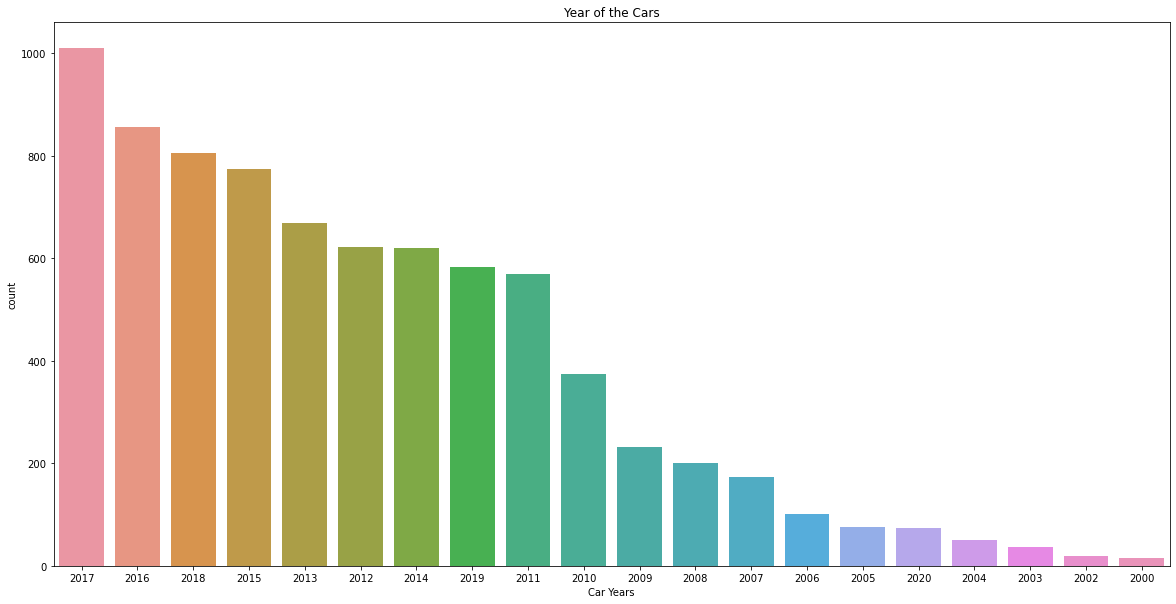

In [116]:
plt.figure(figsize=(20,10))
sns.countplot(x='year', data = car_data, order=car_data['year'].value_counts().iloc[:20].index)

plt.xlabel('Car Years')
plt.title('Year of the Cars')
plt.show()

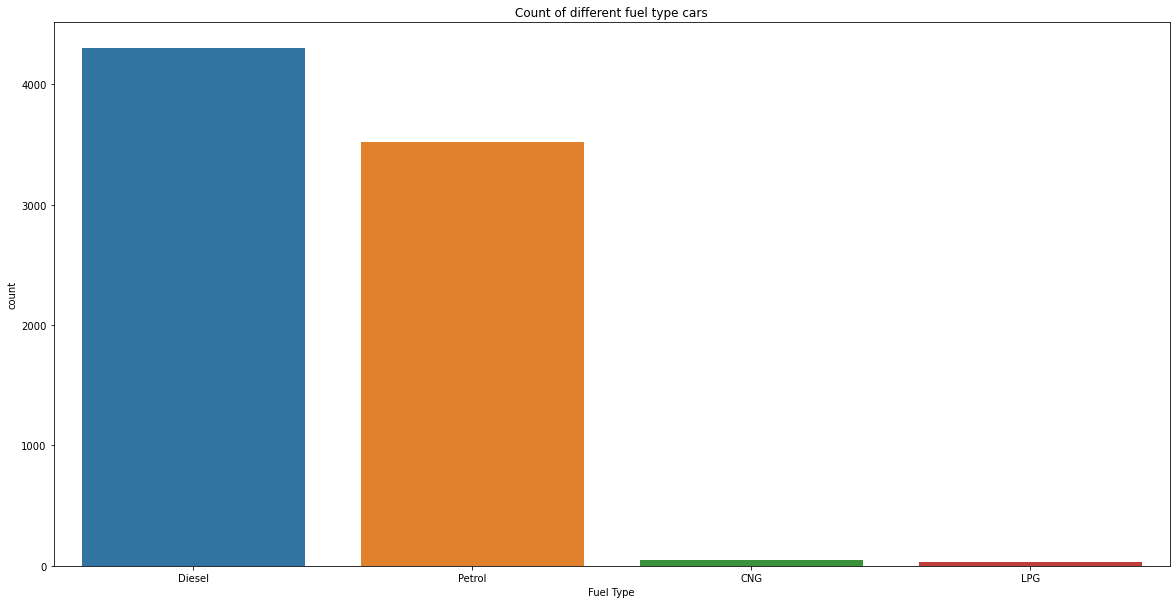

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(x='fuel', data = car_data, order=car_data['fuel'].value_counts().index)

plt.xlabel('Fuel Type')
plt.title('Count of different fuel type cars')
plt.show()

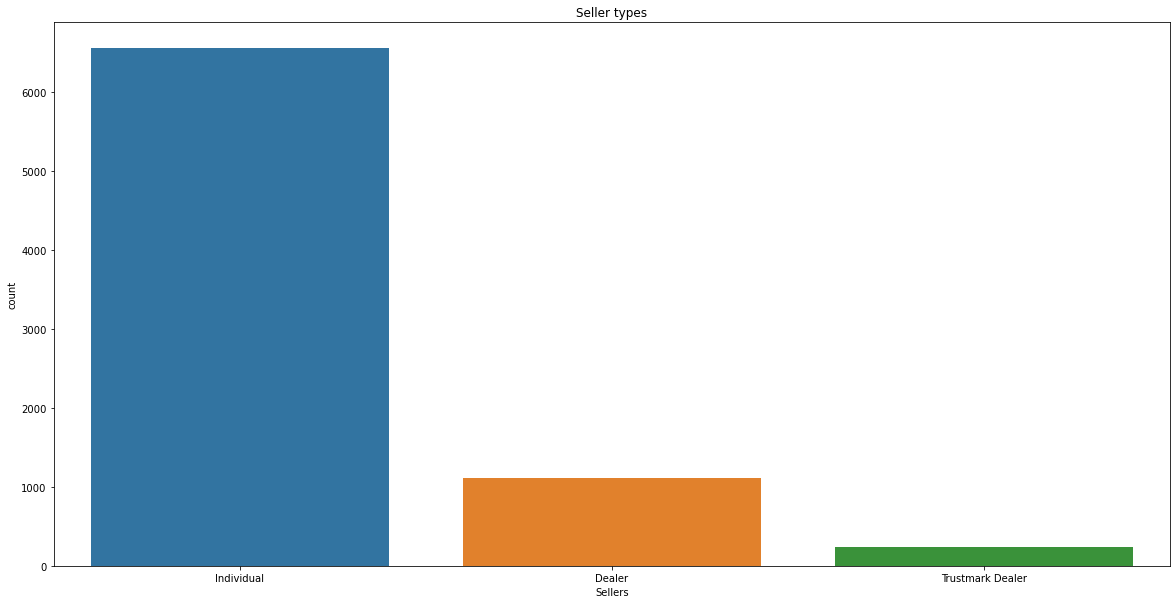

In [118]:
plt.figure(figsize=(20,10))
sns.countplot(x='seller_type', data = car_data, order=car_data['seller_type'].value_counts().index)

plt.xlabel('Sellers')
plt.title('Seller types')
plt.show()

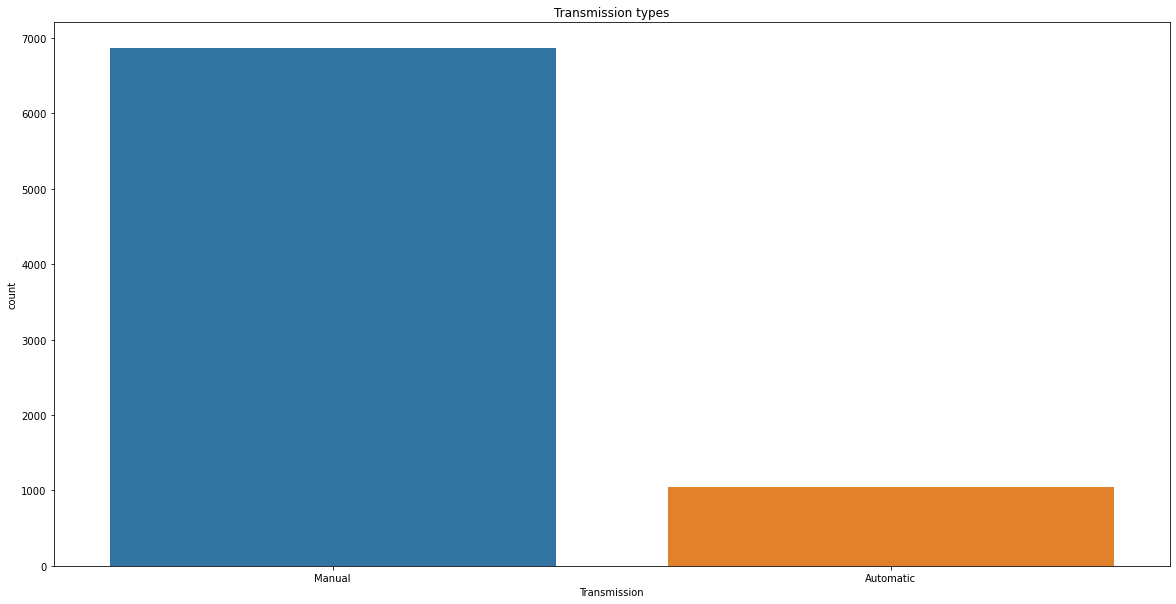

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(x='transmission', data = car_data, order=car_data['transmission'].value_counts().index)

plt.xlabel('Transmission')
plt.title('Transmission types')
plt.show()

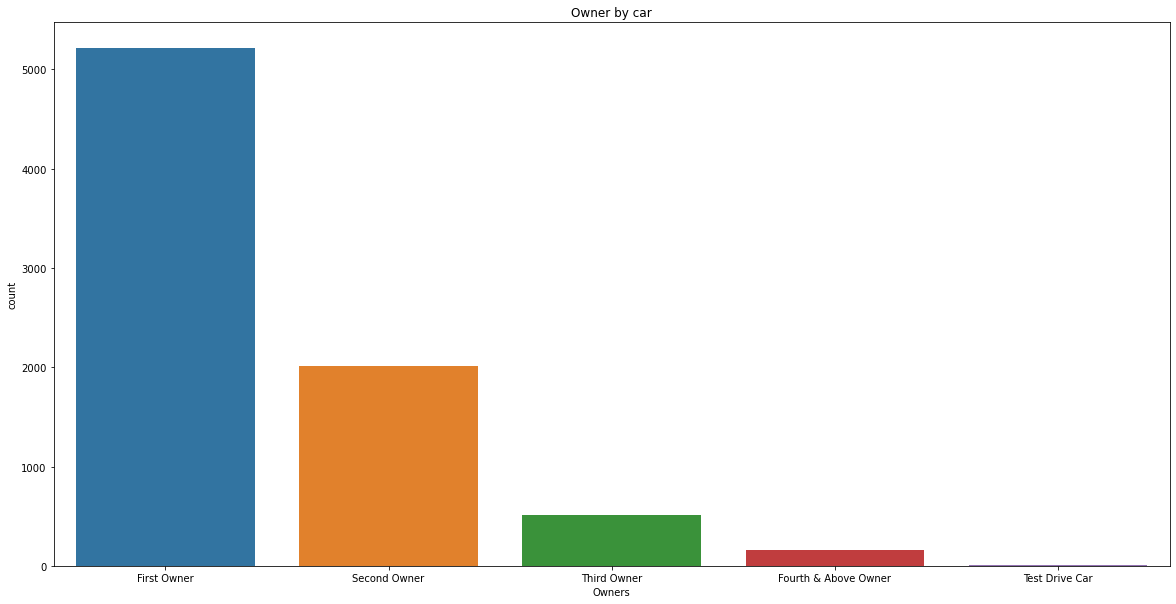

In [120]:
plt.figure(figsize=(20,10))
sns.countplot(x='owner', data = car_data, order=car_data['owner'].value_counts().index)

plt.xlabel('Owners')
plt.title('Owner by car')
plt.show()

#### 2) Selling price as dependent variable

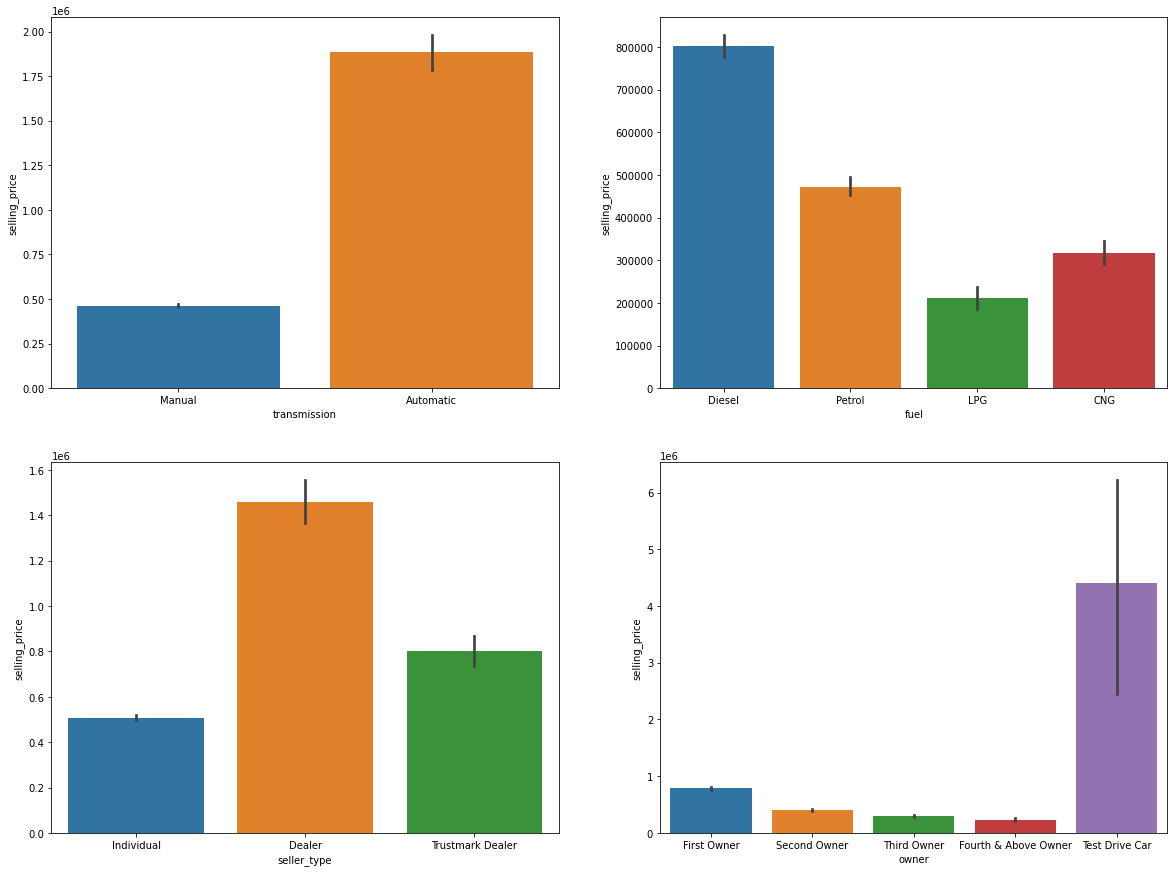

In [121]:
f, axes = plt.subplots(2, 2, figsize=(20,15))

sns.barplot(x= 'transmission', y = 'selling_price', data =  car_data, ax=axes[0,0])
sns.barplot(x= 'fuel', y = 'selling_price', data =  car_data, ax=axes[0,1])
sns.barplot(x= 'seller_type', y = 'selling_price', data =  car_data, ax=axes[1,0])
sns.barplot(x= 'owner', y = 'selling_price', data =  car_data, ax=axes[1,1])

plt.show()

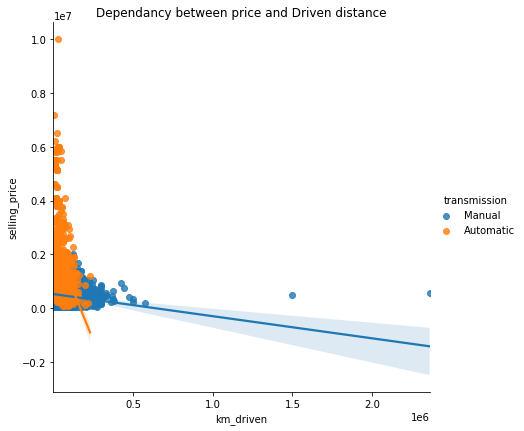

In [122]:
sns.lmplot(x='km_driven',y='selling_price', hue = 'transmission', data=car_data, height=6)

plt.title('Dependancy between price and Driven distance')
plt.show()

We can see that as more km one car was driven, its price is getting lower 

In [123]:
car_data['year'] = 2020 - car_data['year']

E:\programi\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


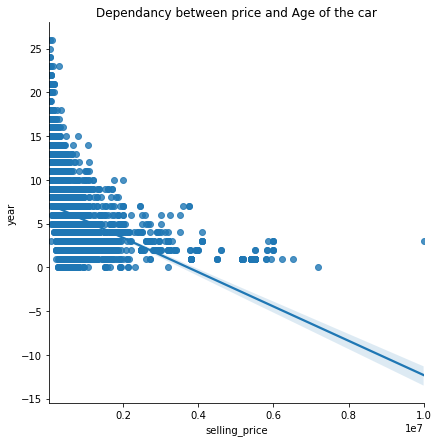

In [124]:
sns.lmplot(x='selling_price', y='year', data=car_data, height=6)

plt.title('Dependancy between price and Age of the car')
plt.show()

Here also as the car year goes up the selling price is getting lower 

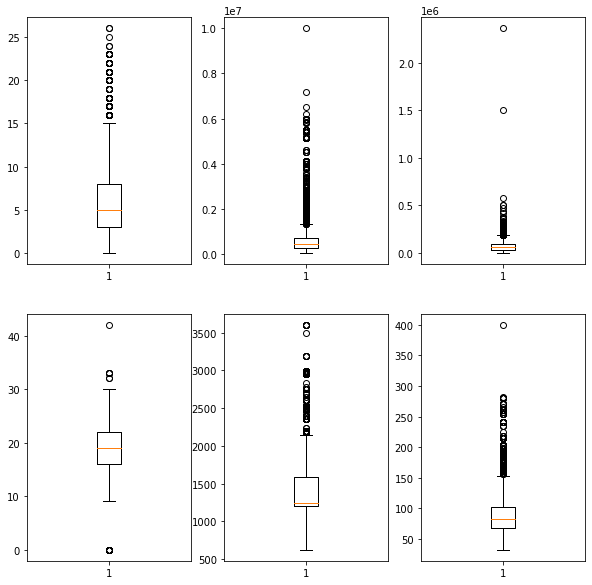

In [125]:
f, axes = plt.subplots(2,3, figsize=(10,10))

axes[0,0].boxplot(x= car_data.year)
axes[0,1].boxplot(x= car_data.selling_price)
axes[0,2].boxplot(x= car_data.km_driven)
axes[1,0].boxplot(x= car_data.mileage)
axes[1,1].boxplot(x= car_data.engine)
axes[1,2].boxplot(x= car_data.max_power)

plt.show()

## Preprocessing

In [126]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV,  BayesianRidge, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

from sklearn.kernel_ridge import KernelRidge

from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

I'm going to predict with Regression models the selling price and try to build a model with high R2 score.

In [127]:
car_attribures = car_data.drop('selling_price', axis = 1)
car_target = car_data.selling_price

In [128]:
car_attribures = pd.get_dummies(car_attribures, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [129]:
car_attribures = car_attribures.rename(columns={'year': 'vehicle_age'})

In [130]:
print(car_attribures.shape)
print(car_target.shape)

(7906, 20)
(7906,)


Here I'm going to preform train_test split with 20% of testing values

In [131]:
car_attribures_train, car_attribures_test, car_target_train, car_target_test = train_test_split(car_attribures,car_target,
                                                                                               test_size = 0.2, random_state = 42)

#### Functions to use:
 1) get_model_score will give me cross_validation scores, r2 scores and mean_absolute for train and test
 
 2) get_residual_plot - will plot a graph in which im going to inspect if testing predictions are away form given ones

In [132]:
def get_model_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    cv = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', cv = 5)
    cv_score = cv.mean()
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    
    print("Mean CV score: ",cv_score)
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)


    

In [133]:
def get_residual_plot(estimator, X_test, y_test):
    test_price_predictions = estimator.predict(X_test)
    plt.scatter(test_price_predictions, test_price_predictions - y_test)
    plt.title('Resedual plot')
    plt.xlabel("Predicted PRices")
    plt.ylabel("Residuals/Differences")

## Pipelines

I'm going to define pipelines for each regression method, using MinMaxScaler. That way is faster and automated 

### Linear Regression

In [134]:
linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lin_reg', LinearRegression())
])

### Lasso

In [135]:
lasso = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lass_reg', LassoCV(cv = 6))
])

### Elastic Net

In [136]:
Enet = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 1)),
    ('elastic_reg', ElasticNetCV(cv = 6))
])

### Kernel Ridge Reggersion

In [137]:
KRR = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kernel_r', KernelRidge())
])

### Gradient Boosting

In [138]:
GBoost = Pipeline([
    ('scaler', MinMaxScaler()),
    ('Gradient_boost', GradientBoostingRegressor())
])

### Adaptive Boosting

In [139]:
AdaBoost = Pipeline([
    ('scaler', MinMaxScaler()),
    ('AdaBoost_boost', AdaBoostRegressor())
])

### LightGBM

In [140]:
model_lgb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lgbm', LGBMRegressor())
])

## Scores of the modles

Let's see how each model performes without any hyperparameters. We will coose the best ones for the tuning

In [141]:
get_model_score(linear, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.6783669052009733
R2 score_train:  0.6913389814460273
R2 score_test:  0.6535356864442702
Train Mean Squeare Error:  276245.541246615
Test Mean Squeare Error:  283498.512331103


In [142]:
get_model_score(lasso, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.6770767244778518
R2 score_train:  0.6898307644867363
R2 score_test:  0.6500791544832456
Train Mean Squeare Error:  274685.9156462607
Test Mean Squeare Error:  283010.536169633


In [143]:
get_model_score(Enet, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  -0.0005867298143065414
R2 score_train:  0.00018666557874846834
R2 score_test:  0.00012379016865893266
Train Mean Squeare Error:  427978.17671864014
Test Mean Squeare Error:  415556.05572865065


In [144]:
get_model_score(KRR, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.6815837400855389
R2 score_train:  0.6908373087907849
R2 score_test:  0.6525629165992037
Train Mean Squeare Error:  274493.0448858894
Test Mean Squeare Error:  282255.37428328797


In [145]:
get_model_score(GBoost, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.9518480600983926
R2 score_train:  0.9711456305937601
R2 score_test:  0.9533604420075364
Train Mean Squeare Error:  86805.28334281374
Test Mean Squeare Error:  98556.11696664483


In [146]:
get_model_score(AdaBoost, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.8216910686888198
R2 score_train:  0.8448104934515808
R2 score_test:  0.8099299583357737
Train Mean Squeare Error:  270816.25077848264
Test Mean Squeare Error:  278809.2517513795


In [147]:
get_model_score(model_lgb, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.9583694909293501
R2 score_train:  0.9810003061930137
R2 score_test:  0.964800972807759
Train Mean Squeare Error:  63817.09834466453
Test Mean Squeare Error:  78935.8588606744


As expected we can see that boosting algorithms are the bes ones GradientBoost and LGBMRegressor.
they have bes R2 scores for both reain and test data and mean CV score 

### Gradient Boosting Grid search

In [148]:
param_grid = {
    'Gradient_boost__n_estimators': [80, 160, 200], 
    'Gradient_boost__min_samples_leaf': [2, 5],
    'Gradient_boost__max_depth': [3, 9, 18]
    
}

In [149]:
ada_boost_gs = GridSearchCV(estimator = GBoost, param_grid = param_grid, scoring = 'r2', cv = 5)

In [150]:
get_model_score(ada_boost_gs, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.9608620784720386
R2 score_train:  0.9935855642246941
R2 score_test:  0.9729961364122411
Train Mean Squeare Error:  44630.527774411705
Test Mean Squeare Error:  70776.10372878225


In [151]:
ada_boost_gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Gradient_boost',
                 GradientBoostingRegressor(max_depth=9, min_samples_leaf=5,
                                           n_estimators=160))])

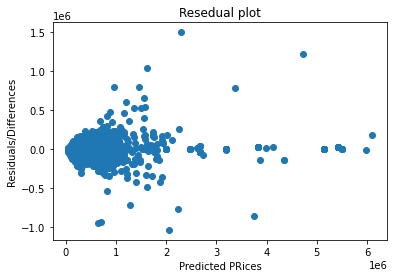

In [152]:
get_residual_plot(ada_boost_gs, car_attribures_test, car_target_test)

### LGBMRegressor

In [153]:
param_grid = {
             'lgbm__num_leaves': [ 50, 100], 
             'lgbm__n_estimators': [800, 1000],
             'lgbm__reg_lambda': [0.005, 0.5]
}

In [154]:
lgb_boost_gs = GridSearchCV(model_lgb, param_grid, scoring = 'r2', cv = 5)

In [155]:
get_model_score(lgb_boost_gs, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.9597223216542805
R2 score_train:  0.9962690180413649
R2 score_test:  0.9699307114379653
Train Mean Squeare Error:  32149.475677125716
Test Mean Squeare Error:  69901.83557545117


In [156]:
lgb_boost_gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lgbm',
                 LGBMRegressor(n_estimators=800, num_leaves=50,
                               reg_lambda=0.5))])

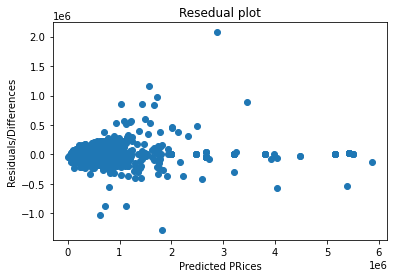

In [157]:
get_residual_plot(lgb_boost_gs, car_attribures_test, car_target_test)

### Pipeline with poly

In [158]:
model_lgb_poly = Pipeline([
    ('scaler1', PolynomialFeatures(degree = 2, interaction_only=False)),
    ('lgbm', LGBMRegressor())
])

In [159]:
get_model_score(model_lgb_poly, car_attribures_train, car_attribures_test, car_target_train, car_target_test)

Mean CV score:  0.9549397720631946
R2 score_train:  0.9863387064253462
R2 score_test:  0.9710461033788845
Train Mean Squeare Error:  56067.6910457252
Test Mean Squeare Error:  73742.63895459085


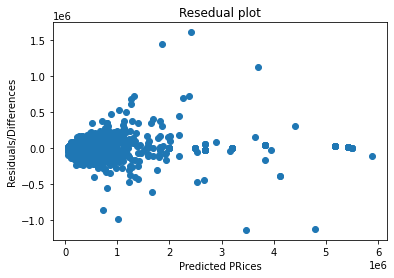

In [160]:
get_residual_plot(model_lgb_poly, car_attribures_test, car_target_test)

So we can see, by the 3 Residual plots, that we have a lot of really good price prediction (based on the 0 line).

The model with polynomial scaler, the dots are all over the place, it's not the best one.

In [161]:
b = pd.DataFrame(car_target_train)

In [162]:
b['predicted'] = model_lgb_poly.predict(car_attribures_train)


In [163]:
b['Difference'] = b.predicted - b.selling_price

In [164]:
b

,selling_price,predicted,Difference
3012,700000,575781.647611,-124218.352389
5884,390000,432958.516758,42958.516758
341,170000,203533.741663,33533.741663
6902,250000,323934.134268,73934.134268
7914,169000,193333.084693,24333.084693
...,...,...,...
7333,695000,687148.206976,-7851.793024
1843,1050000,840929.201032,-209070.798968
3114,950000,901527.494289,-48472.505711
652,225000,246430.442798,21430.442798


In [165]:
data_to_exclude = b[(b.Difference <= -800000) | (b.Difference >= 500000)].index

In [166]:
excl = car_attribures_train.drop(data_to_exclude, axis = 0)

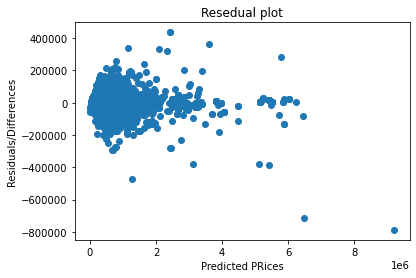

In [167]:
get_residual_plot(lgb_boost_gs, car_attribures_train, car_target_train)

In [168]:
car_attribures_train.shape

(6324, 20)

In [169]:
car_attribures_train = car_attribures_train.drop(axis = 0, index=data_to_exclude)


In [170]:
car_target_train = car_target_train.drop(axis = 0, index=data_to_exclude)

In [171]:
car_attribures_train.shape, car_target_train.shape

((6317, 20), (6317,))

In [172]:
c = LGBMRegressor(n_estimators=1000, num_leaves=50, reg_lambda=0.005)

In [173]:
c.fit(car_attribures_train, car_target_train)

LGBMRegressor(n_estimators=1000, num_leaves=50, reg_lambda=0.005)

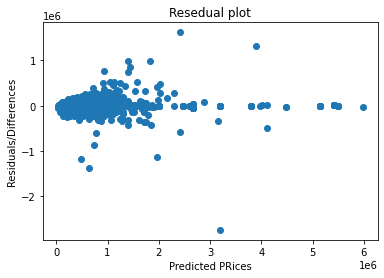

In [174]:
get_residual_plot(c, car_attribures_test, car_target_test)

In [175]:
predicted_p = c.predict(car_attribures_test)

In [176]:
p = pd.DataFrame(predicted_p, columns=['pred'])

In [177]:
p[p.pred >= 3e6]

,pred
2,5.417324e+06
39,4.481230e+06
64,5.417324e+06
106,5.417324e+06
130,3.199840e+06
137,5.499970e+06
217,3.185558e+06
220,3.800162e+06
247,3.800162e+06
344,3.199840e+06
